## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation = "relu")(input_layer)
    x = keras.layers.Dense(units = 256, activation = "relu")(x)
    x = keras.layers.Dense(units = 128, activation = "relu")(x)
    out = keras.layers.Dense(units = 10, activation = "softmax")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.0, decay = 0.0, nesterov = False)
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 7ms/step - loss: 2.0642 - accuracy: 0.2667 - val_loss: 1.9450 - val_accuracy: 0.3063
Epoch 2/500
196/196 [==============================] - 1s 6ms/step - loss: 1.8753 - accuracy: 0.3403 - val_loss: 1.8466 - val_accuracy: 0.3442
Epoch 3/500
196/196 [==============================] - 1s 7ms/step - loss: 1.8083 - accuracy: 0.3626 - val_loss: 1.8068 - val_accuracy: 0.3600
Epoch 4/500
196/196 [==============================] - 1s 6ms/step - loss: 1.7605 - accuracy: 0.3806 - val_loss: 1.7895 - val_accuracy: 0.3569
Epoch 5/500
196/196 [==============================] - 1s 6ms/step - loss: 1.7241 - accuracy: 0.3951 - val_loss: 1.7699 - val_accuracy: 0.3714
Epoch 6/500
196/196 [==============================] - 1s 6ms/step - loss: 1.6944 - accuracy: 0.4064 - val_loss: 1.6693 - val_accuracy: 0.4136
Epoch 7/500
196/196 [==============================] - 1s 6ms/step - loss: 1.6630 - accuracy: 0.4148 - val_loss: 1.7234 - val_accuracy: 0.3941

Epoch 58/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1811 - accuracy: 0.5855 - val_loss: 1.4144 - val_accuracy: 0.5034
Epoch 59/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1788 - accuracy: 0.5847 - val_loss: 1.4088 - val_accuracy: 0.4987
Epoch 60/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1687 - accuracy: 0.5895 - val_loss: 1.3637 - val_accuracy: 0.5158
Epoch 61/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1640 - accuracy: 0.5903 - val_loss: 1.4805 - val_accuracy: 0.4780
Epoch 62/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1539 - accuracy: 0.5964 - val_loss: 1.4585 - val_accuracy: 0.4801
Epoch 63/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1566 - accuracy: 0.5935 - val_loss: 1.4174 - val_accuracy: 0.5053
Epoch 64/500
196/196 [==============================] - 1s 6ms/step - loss: 1.1485 - accuracy: 0.5962 - val_loss: 1.4025 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 1s 6ms/step - loss: 0.8842 - accuracy: 0.6919 - val_loss: 1.3947 - val_accuracy: 0.5252
Epoch 116/500
196/196 [==============================] - 1s 6ms/step - loss: 0.8696 - accuracy: 0.6972 - val_loss: 1.3764 - val_accuracy: 0.5321
Epoch 117/500
196/196 [==============================] - 1s 6ms/step - loss: 0.8625 - accuracy: 0.7010 - val_loss: 1.5736 - val_accuracy: 0.4882
Epoch 118/500
196/196 [==============================] - 1s 6ms/step - loss: 0.8599 - accuracy: 0.6999 - val_loss: 1.5469 - val_accuracy: 0.4907
Epoch 119/500
196/196 [==============================] - 1s 7ms/step - loss: 0.8528 - accuracy: 0.7041 - val_loss: 1.5280 - val_accuracy: 0.5106
Epoch 120/500
196/196 [==============================] - 1s 7ms/step - loss: 0.8504 - accuracy: 0.7038 - val_loss: 1.5308 - val_accuracy: 0.5072
Epoch 121/500
196/196 [==============================] - 1s 7ms/step - loss: 0.8462 - accuracy: 0.7055 - val_loss: 1.3493 - val_ac

196/196 [==============================] - 1s 7ms/step - loss: 0.5912 - accuracy: 0.7999 - val_loss: 1.9179 - val_accuracy: 0.4837
Epoch 172/500
196/196 [==============================] - 1s 7ms/step - loss: 0.6019 - accuracy: 0.7945 - val_loss: 1.5987 - val_accuracy: 0.5218
Epoch 173/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5910 - accuracy: 0.7984 - val_loss: 1.7322 - val_accuracy: 0.5143
Epoch 174/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5857 - accuracy: 0.8008 - val_loss: 1.5281 - val_accuracy: 0.5359
Epoch 175/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5806 - accuracy: 0.8023 - val_loss: 1.7772 - val_accuracy: 0.5069
Epoch 176/500
196/196 [==============================] - 1s 7ms/step - loss: 0.6006 - accuracy: 0.7957 - val_loss: 1.5731 - val_accuracy: 0.5340
Epoch 177/500
196/196 [==============================] - 1s 7ms/step - loss: 0.5569 - accuracy: 0.8104 - val_loss: 1.9709 - val_accuracy: 0.4763

196/196 [==============================] - 1s 7ms/step - loss: 0.3521 - accuracy: 0.8888 - val_loss: 1.7869 - val_accuracy: 0.5440
Epoch 228/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3625 - accuracy: 0.8844 - val_loss: 2.1277 - val_accuracy: 0.5065
Epoch 229/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3408 - accuracy: 0.8924 - val_loss: 1.8100 - val_accuracy: 0.5409
Epoch 230/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3376 - accuracy: 0.8946 - val_loss: 1.9070 - val_accuracy: 0.5154
Epoch 231/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3340 - accuracy: 0.8977 - val_loss: 1.8721 - val_accuracy: 0.5311
Epoch 232/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3191 - accuracy: 0.8996 - val_loss: 1.9889 - val_accuracy: 0.5146
Epoch 233/500
196/196 [==============================] - 1s 7ms/step - loss: 0.3278 - accuracy: 0.8978 - val_loss: 1.9096 - val_accuracy: 0.5275

196/196 [==============================] - 1s 7ms/step - loss: 0.1739 - accuracy: 0.9539 - val_loss: 2.4363 - val_accuracy: 0.5079
Epoch 284/500
196/196 [==============================] - 1s 7ms/step - loss: 0.2053 - accuracy: 0.9438 - val_loss: 2.3708 - val_accuracy: 0.4783
Epoch 285/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1532 - accuracy: 0.9610 - val_loss: 2.3141 - val_accuracy: 0.5252
Epoch 286/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1436 - accuracy: 0.9631 - val_loss: 2.2144 - val_accuracy: 0.5422
Epoch 287/500
196/196 [==============================] - 1s 6ms/step - loss: 0.1522 - accuracy: 0.9611 - val_loss: 2.1880 - val_accuracy: 0.5416
Epoch 288/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1615 - accuracy: 0.9592 - val_loss: 2.1675 - val_accuracy: 0.5447
Epoch 289/500
196/196 [==============================] - 1s 7ms/step - loss: 0.1269 - accuracy: 0.9701 - val_loss: 2.2024 - val_accuracy: 0.5239

196/196 [==============================] - 1s 6ms/step - loss: 0.0547 - accuracy: 0.9929 - val_loss: 2.4460 - val_accuracy: 0.5404
Epoch 340/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9931 - val_loss: 2.4608 - val_accuracy: 0.5420
Epoch 341/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0517 - accuracy: 0.9929 - val_loss: 2.6324 - val_accuracy: 0.5194
Epoch 342/500
196/196 [==============================] - 1s 7ms/step - loss: 0.4396 - accuracy: 0.8827 - val_loss: 2.4488 - val_accuracy: 0.5309
Epoch 343/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0793 - accuracy: 0.9848 - val_loss: 4.6268 - val_accuracy: 0.3907
Epoch 344/500
196/196 [==============================] - 1s 6ms/step - loss: 0.2984 - accuracy: 0.9260 - val_loss: 2.6891 - val_accuracy: 0.5084
Epoch 345/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0980 - accuracy: 0.9807 - val_loss: 2.4657 - val_accuracy: 0.5329

196/196 [==============================] - 1s 7ms/step - loss: 0.0200 - accuracy: 0.9989 - val_loss: 2.7932 - val_accuracy: 0.5375
Epoch 396/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0197 - accuracy: 0.9990 - val_loss: 2.7680 - val_accuracy: 0.5424
Epoch 397/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0191 - accuracy: 0.9989 - val_loss: 2.7918 - val_accuracy: 0.5435
Epoch 398/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 0.9990 - val_loss: 2.8291 - val_accuracy: 0.5389
Epoch 399/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0185 - accuracy: 0.9991 - val_loss: 2.8288 - val_accuracy: 0.5413
Epoch 400/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0178 - accuracy: 0.9992 - val_loss: 2.8141 - val_accuracy: 0.5408
Epoch 401/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0175 - accuracy: 0.9994 - val_loss: 2.8117 - val_accuracy: 0.5408

196/196 [==============================] - 1s 7ms/step - loss: 0.0090 - accuracy: 0.9998 - val_loss: 3.0991 - val_accuracy: 0.5410
Epoch 452/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0088 - accuracy: 0.9999 - val_loss: 3.1163 - val_accuracy: 0.5404
Epoch 453/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0088 - accuracy: 0.9998 - val_loss: 3.1038 - val_accuracy: 0.5436
Epoch 454/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0087 - accuracy: 0.9999 - val_loss: 3.1022 - val_accuracy: 0.5407
Epoch 455/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0085 - accuracy: 0.9999 - val_loss: 3.1078 - val_accuracy: 0.5405
Epoch 456/500
196/196 [==============================] - 1s 7ms/step - loss: 0.0084 - accuracy: 0.9999 - val_loss: 3.1192 - val_accuracy: 0.5402
Epoch 457/500
196/196 [==============================] - 1s 6ms/step - loss: 0.0084 - accuracy: 0.9999 - val_loss: 3.1155 - val_accuracy: 0.5400

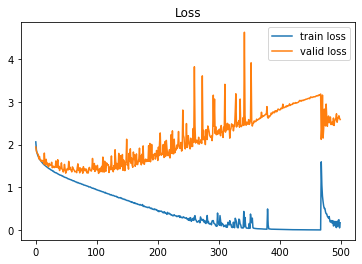

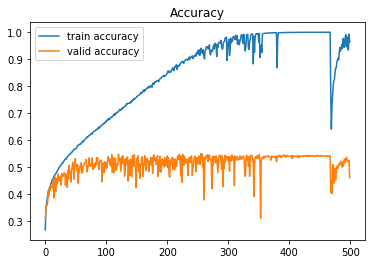

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()